ALI IRTAZA G47541925

In [1]:
import random
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
def cross_product(point_a, point_b, point_c):
    return (point_b[0] - point_a[0]) * (point_c[1] - point_a[1]) - (point_b[1] - point_a[1]) * (point_c[0] - point_a[0])

def combine_hulls(hull_one, hull_two):
    all_points = hull_one + hull_two
    all_points.sort(key=lambda p: (p[0], p[1]))

    lower_hull = []
    for current_point in all_points:
        while len(lower_hull) >= 2 and cross_product(lower_hull[-2],lower_hull[-1],current_point) <= 0:
            lower_hull.pop()
        lower_hull.append(current_point)

    upper_hull = []
    for current_point in reversed(all_points):
        while len(upper_hull) >= 2 and cross_product(upper_hull[-2], upper_hull[-1], current_point) <= 0:
            upper_hull.pop()
        upper_hull.append(current_point)
    return lower_hull[:-1] + upper_hull[:-1]

def find_convex_hull(point_list):
    if len(point_list) <= 3:
        return sorted(point_list, key=lambda p: (p[0], p[1]))
    
    midpoint = len(point_list) // 2
    left_segment = point_list[:midpoint]
    right_segment = point_list[midpoint:]
    
    left_hull = find_convex_hull(left_segment)
    right_hull = find_convex_hull(right_segment)
    
    return combine_hulls(left_hull, right_hull)

def visualize_hull(points, hull):
    plt.figure(figsize=(10, 6))
    x_coords, y_coords = zip(*points)
    plt.scatter(x_coords, y_coords, color='blue', label='Points')

    if hull:
        hull.append(hull[0])
        x_hull, y_hull = zip(*hull)
        plt.plot(x_hull, y_hull, color='red', label='Convex Hull')

    plt.title('Convex Hull Visualization')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.axhline(0, color='black', linewidth=0.5, ls='--')
    plt.axvline(0, color='black', linewidth=0.5, ls='--')
    plt.grid()
    plt.legend()
    plt.show()

##### Visualizing a Convex Hull

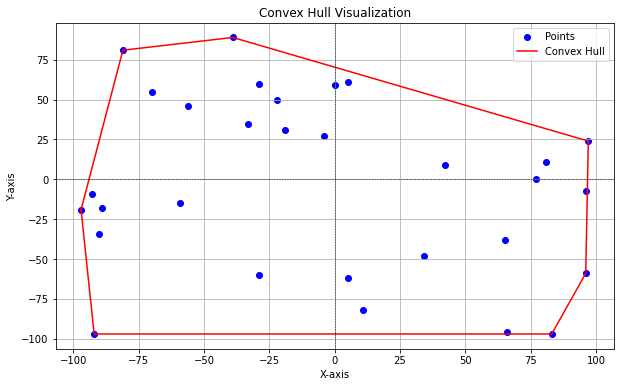

In [3]:
point_data = [[65, -38], [-59, -15], [-81, 81], [66, -96], [83, -97],
              [-4, 27], [-90, -34], [-29, 60], [-97, -19], [5, 61],
              [81, 11], [42, 9], [-33, 35], [77, 0], [-22, 50],
              [96, -59], [34, -48], [-92, -97], [11, -82], [-89, -18],
              [-93, -9], [97, 24], [-56, 46], [-70, 55], [5, -62],
              [0, 59], [-39, 89], [-19, 31], [-29, -60], [96, -7]]

sorted_points = sorted(point_data, key=lambda p: p[0])
hull_result = find_convex_hull(sorted_points)
visualize_hull(sorted_points, hull_result)

In [4]:
def measure_time(points):
    start_time = time.time_ns()
    hull = find_convex_hull(points)
    end_time = time.time_ns()
    elapsed_time = end_time - start_time
    return elapsed_time, hull

In [8]:
num_points_list = [100,200,300, 400, 500,600,900, 1000, 10000, 100000, 1000000, 10000000]
for num_points in num_points_list:
    points = np.random.randint(-100, 100, size=(num_points, 2)).tolist()
    elapsed_time, hull = measure_time(points)
    print(f"Number of points: {num_points}, Time taken: {elapsed_time} nanoseconds")

Number of points: 100, Time taken: 0 nanoseconds
Number of points: 200, Time taken: 1037000 nanoseconds
Number of points: 300, Time taken: 1993800 nanoseconds
Number of points: 400, Time taken: 3175500 nanoseconds
Number of points: 500, Time taken: 6852200 nanoseconds
Number of points: 600, Time taken: 4614400 nanoseconds
Number of points: 900, Time taken: 10041100 nanoseconds
Number of points: 1000, Time taken: 7009600 nanoseconds
Number of points: 10000, Time taken: 71108700 nanoseconds
Number of points: 100000, Time taken: 595739000 nanoseconds
Number of points: 1000000, Time taken: 6816840000 nanoseconds
Number of points: 10000000, Time taken: 64374508400 nanoseconds
